In [1]:
from datasets import load_from_disk
from IPython.display import display
from pathlib import Path
from PIL import Image
from io import BytesIO

c:\Users\polok\Documents\Studies\Engineering Thesis\captioning-pipeline\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dastaset_output_dir = Path("../../../data/dataset/evaluated")

dataset = load_from_disk(dastaset_output_dir)

dataset_df = dataset.to_pandas()

In [3]:
dataset_df

,image_encoded,context,prompt,caption,llm_metric
0,iVBORw0KGgoAAAANSUhEUgAAAQAAAAEACAYAAABccqhmAA...,"1 highway service, 1 highway path, 1 natural w...","""Describe the image in detail. The image is a ...",The image features a layout primarily consisti...,7
1,iVBORw0KGgoAAAANSUhEUgAAAQAAAAEACAYAAABccqhmAA...,"1 highway path, 1 natural water, 1 highway tra...","""Describe the image in detail. The image is a ...",The image features a landscape with a highway ...,7
2,iVBORw0KGgoAAAANSUhEUgAAAQAAAAEACAYAAABccqhmAA...,"1 highway service, 1 natural water, 1 leisure ...","""Describe the image in detail. The image is a ...","The image features a section of a mapped area,...",8



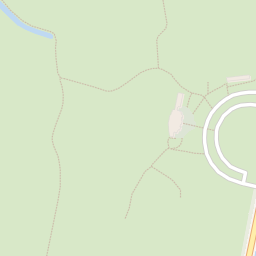
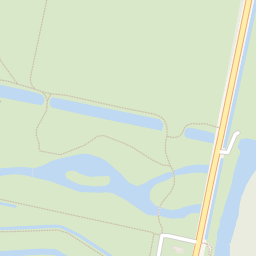
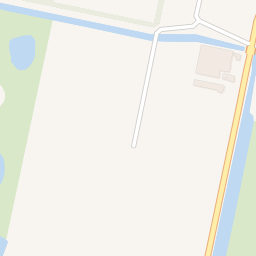

In [4]:
from IPython.display import display, HTML

html = """
<div style='display: flex; flex-wrap: wrap;'>
"""

for idx, row in dataset_df.iterrows():
    image_encoded = row["image_encoded"]

    # Generate HTML for image, context, and collapsible prompt
    html += f"""
    <div style='display: flex; margin: 15px; text-align: left; align-items: center;'>
        <div style='margin-right: 20px; min-width: 250px;'>
            <img src='data:image/png;base64,{image_encoded}' style='width: 100%; height: auto;'/>
        </div>
        <div>
            <h4 onclick="this.nextElementSibling.style.display = this.nextElementSibling.style.display === 'none' ? 'block' : 'none';" 
                style="cursor: pointer; color: grey; text-decoration: underline;">Context</h4>
            <p style='display: none;'>{row['context']}</p>
            
            <h4 onclick="this.nextElementSibling.style.display = this.nextElementSibling.style.display === 'none' ? 'block' : 'none';" 
                style="cursor: pointer; color: grey; text-decoration: underline;">Prompt</h4>
            <p style='display: none;'>{row['prompt']}</p>
        
            <h4>Caption</h4>
            <p>{row['caption']}</p>

            <h4>LLM Metric</h4>
            <p>{row['llm_metric']}</p>
        </div>
    </div>
    """

html += "</div>"
display(HTML(html))